In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import matplotlib.cm as cm
from matplotlib.ticker import MultipleLocator

method_path = "figs/QSSA/SIM_results/"
mechanism_name = "NH3_otomo"

case_name = "case_NH3_counterflow_KAUST"

color_arr = ('k','r','b','y','g', 'c','m')
symbol_arr = ('s','o','v','^','*')
# ─── Use generic serif font ───────────────────────────────────────────────────
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"]   = 6

# figure 1 (a): Compare mechanism on premixed flames and non-premixed flames

/tmp/ipykernel_17835/442845043.py:134: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0,0,1,0.95])


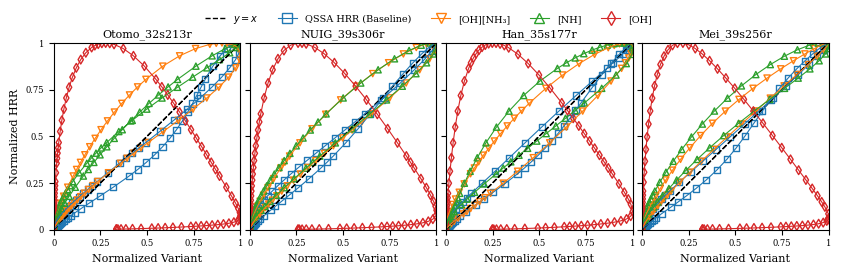

→ Saved figure at: figs/validation/HRR_vs_variants_by_mechanism.png


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import FixedLocator, FixedFormatter

# ─── User‐adjustable settings ──────────────────────────────────────────────────
data_path   = "SIM_results"
qssa_case   = "NH3_2P_CF"
target_case = "NH3_0.80_0.20_phi1.00"
mechs       = [
    "Otomo_32s213r",
    "NUIG_39s306r",
    "Han_35s177r",
    "Mei_39s256r",
]

# ─── Grab Tab10 colors & define your method‐to‐color mapping ──────────────────
tab10 = plt.get_cmap("tab10").colors
series_colors = {
    "$y = x$":             "k",         # black
    "QSSA HRR (Baseline)": tab10[0],    # orange
    "[OH][NH₃]":           tab10[1],    # green
    "[NH]":                tab10[2],    # red
    "[OH]":                tab10[3],    # purple
}

# ─── Build your style tuples from that dict ─────────────────────────────────
#   (label, linestyle, color, marker)
series_info = [
    ("$y = x$",             "--", series_colors["$y = x$"],             None),
    ("QSSA HRR (Baseline)", "-",  series_colors["QSSA HRR (Baseline)"], "s"),
    ("[OH][NH₃]",            "-",  series_colors["[OH][NH₃]"],           "v"),
    ("[NH]",                 "-",  series_colors["[NH]"],                "^"),
    ("[OH]",                 "-",  series_colors["[OH]"],                "d"),
]

# ─── Function to plot one mechanism ─────────────────────────────────────────
def plot_one_mech(ax, mech):
    # Load DNS
    sim_csv = os.path.join(data_path, qssa_case, mech, f"{target_case}.csv")
    df_sim  = pd.read_csv(sim_csv, comment="#")

    # Load QSSA (baseline)
    qssa_csv = os.path.join(
        "figs","QSSA", data_path, qssa_case, target_case, mech, "predicted_X.csv"
    )
    df_qssa = pd.read_csv(qssa_csv, comment="#")

    # Normalize HRR
    sim_hrr_norm  = df_sim["HRR"].to_numpy()
    sim_hrr_norm /= sim_hrr_norm.max()
    qssa_hrr_norm = df_qssa["HRR"].to_numpy()
    qssa_hrr_norm /= qssa_hrr_norm.max()

    # Prepare variants
    oh_nh3 = (df_sim["X_OH"]  * df_sim["X_NH3"]).to_numpy()
    nh     = df_sim["X_NH"].to_numpy()
    oh     = df_sim["X_OH"].to_numpy()

    variants = [
        (sim_hrr_norm,               sim_hrr_norm),     # y=x
        (qssa_hrr_norm,              sim_hrr_norm),     # QSSA vs SIM
        (oh_nh3/oh_nh3.max(),        sim_hrr_norm),     # [OH][NH₃]
        (nh/nh.max(),                sim_hrr_norm),     # [NH]
        (oh/oh.max(),                sim_hrr_norm),     # [OH]
    ]

    # Plot each series with its style
    for (label, ls, color, marker), (xv, yv) in zip(series_info, variants):
        if marker is None:
            ax.plot(xv, yv, linestyle=ls, color=color, linewidth=1)
        else:
            ax.plot(xv, yv, linestyle=ls, color=color, linewidth=0.8)
            ax.scatter(xv, yv,
                       s=20, marker=marker,
                       facecolors='none', edgecolors=color,
                       label=label)

    # Formatting
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_aspect('equal', adjustable='box')

    ticks = [0,0.25,0.5,0.75,1]
    ax.xaxis.set_major_locator(FixedLocator(ticks))
    ax.yaxis.set_major_locator(FixedLocator(ticks))
    ax.xaxis.set_major_formatter(FixedFormatter([str(t) for t in ticks]))
    ax.yaxis.set_major_formatter(FixedFormatter([str(t) for t in ticks]))
    ax.tick_params(axis='both', which='major', labelsize=6)

    # Only first column shows y‐labels
    if mech == mechs[0]:
        ax.set_ylabel("Normalized HRR", fontsize=8)
    else:
        ax.tick_params(axis='y', labelleft=False)

    # x‐label on all
    ax.set_xlabel("Normalized Variant", fontsize=8)

    # Title = mechanism
    ax.set_title(mech, fontsize=8, pad=4)

# ─── Set up the figure ─────────────────────────────────────────────────────────
fig, axes = plt.subplots(
    1, len(mechs),
    figsize=(2.5 * len(mechs), 2.5),
    sharex=True, sharey=True,
    gridspec_kw={'wspace': 0.05}
)
axes = axes.flatten()

# ─── Draw them ─────────────────────────────────────────────────────────────────
for ax, mech in zip(axes, mechs):
    plot_one_mech(ax, mech)

# ─── Shared legend above ────────────────────────────────────────────────────────
handles, labels = [], []
for label, ls, color, marker in series_info:
    if marker is None:
        h = Line2D([0],[0], linestyle=ls, color=color, linewidth=1)
    else:
        h = Line2D([0],[0], linestyle=ls, color=color,
                   marker=marker, markerfacecolor='none',
                   markeredgecolor=color, markersize=7, linewidth=0.8)
    handles.append(h)
    labels.append(label)

fig.legend(handles, labels,
           loc='upper center', ncol=len(handles),
           frameon=False, fontsize=7, bbox_to_anchor=(0.5,1.02))

fig.tight_layout(rect=[0,0,1,0.95])
os.makedirs("figs/validation", exist_ok=True)
out = "figs/validation/HRR_vs_variants_by_mechanism.png"
plt.savefig(out, dpi=300, bbox_inches='tight')
plt.show()

print(f"→ Saved figure at: {out}")


# figure 1 (b): Compare mechanism on premixed flames and non-premixed flames

/tmp/ipykernel_17835/2292945088.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 1, 0.95])


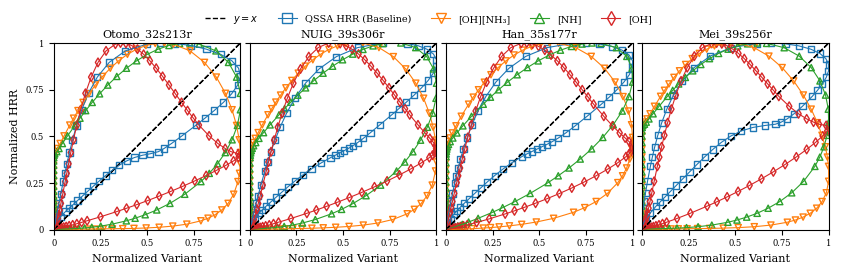

→ Saved figure at: figs/validation/HRR_vs_variants_by_mechanism.png


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# ─── User‐adjustable settings ──────────────────────────────────────────────────
data_path   = "SIM_results"
qssa_case   = "case_NH3_counterflow_KAUST"
target_case = "N_CF_1"
mechs       = [
    "Otomo_32s213r",
    "NUIG_39s306r",
    "Han_35s177r",
    "Mei_39s256r",
]

# ─── Build a consistent Tab10‐based color map ─────────────────────────────────
tab10 = plt.get_cmap("tab10").colors
series_colors = {
    "$y = x$":              "k",         # always black
    "QSSA HRR (Baseline)":  tab10[0],    # first Tab10 color
    "[OH][NH₃]":            tab10[1],    # second Tab10 color
    "[NH]":                 tab10[2],    # third
    "[OH]":                 tab10[3],    # fourth
}

# ─── Plot‐style arrays ─────────────────────────────────────────────────────────
# now we just zip label→(linestyle, color, marker) via the color dict above
series_info = [
    ("$y = x$",             "--", series_colors["$y = x$"],             None),
    ("QSSA HRR (Baseline)", "-", series_colors["QSSA HRR (Baseline)"], "s"),
    ("[OH][NH₃]",           "-", series_colors["[OH][NH₃]"],           "v"),
    ("[NH]",                "-", series_colors["[NH]"],                "^"),
    ("[OH]",                "-", series_colors["[OH]"],                "d"),
]


# ─── Create a 1×N grid of subplots ─────────────────────────────────────────────
n_cols = len(mechs)
fig, axes = plt.subplots(
    1, n_cols,
    figsize=(2.5 * n_cols, 2.5),
    sharex=True, sharey=True,
    gridspec_kw={'wspace': 0.05}
)
axes = axes.flatten()

# ─── Draw all subplots ─────────────────────────────────────────────────────────
for ax, mech in zip(axes, mechs):
    plot_one_mech(ax, mech)

    # lock axes [0,1]
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)

# ─── Shared legend above ────────────────────────────────────────────────────────
proxy_handles = []
proxy_labels  = []
for label, ls, color, marker in series_info:
    if marker is None:
        ph = Line2D([0], [0], linestyle=ls, color=color, linewidth=1)
    else:
        ph = Line2D(
            [0], [0],
            linestyle=ls,
            color=color,
            marker=marker,
            markerfacecolor='none',
            markeredgecolor=color,
            markersize=7,
            linewidth=0.8
        )
    proxy_handles.append(ph)
    proxy_labels.append(label)

fig.legend(
    proxy_handles, proxy_labels,
    loc='upper center',
    ncol=len(proxy_handles),
    frameon=False,
    fontsize=7,
    bbox_to_anchor=(0.5, 1.02)
)

fig.tight_layout(rect=[0, 0, 1, 0.95])

# ─── Save & show ───────────────────────────────────────────────────────────────
out_dir = "figs/validation"
os.makedirs(out_dir, exist_ok=True)
save_path = os.path.join(out_dir, "HRR_vs_variants_by_mechanism.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"→ Saved figure at: {save_path}")


# Figure 2: Compare overall results on NH3 premixed flames


/tmp/ipykernel_17835/3322115784.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0,0,1,0.92])


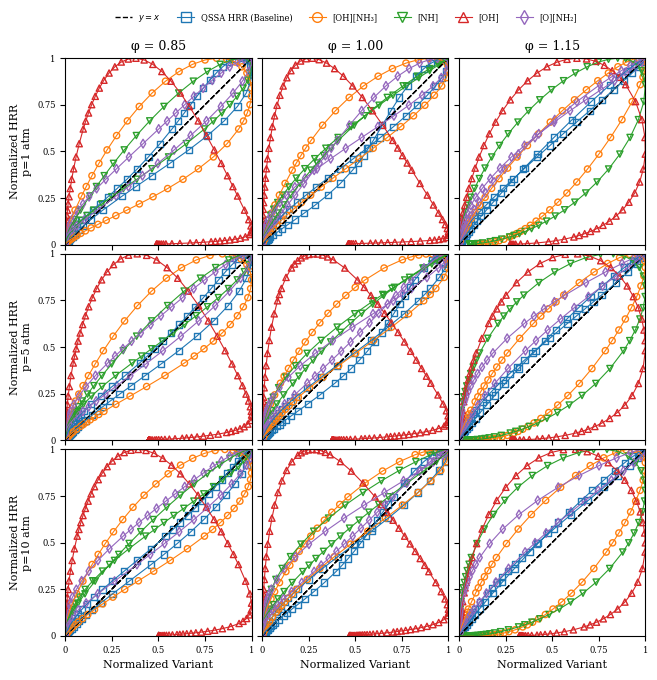

→ Saved figure at: figs/validation/HRR_vs_variants_3x3_beautified_norm_tab10.png


In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
# ─── Option A: change globally ───────────────────────────────────────────────
mpl.rcParams['xtick.labelsize'] = 9
mpl.rcParams['ytick.labelsize'] = 9

# ─── Settings ─────────────────────────────────────────────────────────────────
data_path  = "SIM_results"
qssa_case  = "NH3_2P_CF"
mech       = "Otomo_32s213r"
base_case  = "NH3_1.00_0.00"
phis       = ["0.85", "1.00", "1.15"]
pressures  = ["1", "5", "10"]

# ─── Series definitions ─────────────────────────────────────────────────────────
labels = [
    "$y = x$",
    "QSSA HRR (Baseline)",
    "[OH][NH₃]",
    "[NH]",
    "[OH]",
    "[O][NH₂]",
]
linestyles = ["--", "-", "-", "-", "-", "-", "-"]
markers    = [ None,  "s",   "o",   "v",   "^",   "d",   "P" ]

# grab the first six Tab10 colors:
tab10 = plt.get_cmap("tab10").colors

# explicit color mapping for consistency
series_colors = {
    "$y = x$":               "black",
    "QSSA HRR (Baseline)":   tab10[0],  # green
    "[OH][NH₃]":             tab10[1],  # red
    "[NH]":                  tab10[2],  # purple
    "[OH]":                  tab10[3],  # brown-like
    "[O][NH₂]":              tab10[4],  # pink
}

# pack into a single list of style tuples
series_info = [
    (lbl, ls, series_colors[lbl], mk)
    for lbl, ls, mk in zip(labels, linestyles, markers)
]


# ─── Set up 3×3 grid ───────────────────────────────────────────────────────────
n_rows, n_cols = len(pressures), len(phis)
fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(2.5 * n_cols, 2.5 * n_rows),
    sharex=True, sharey=True,
    gridspec_kw={'hspace': 0.05, 'wspace': 0.05}
)

# Force exact tick locations for both axes (normalized [0–1])
ticks = [0, 0.25, 0.5, 0.75, 1]

def plot_case(ax, phi, p):
    case_name = f"{base_case}_phi{phi}_p{p}"
    # load DNS & QSSA
    df_sim  = pd.read_csv(os.path.join(data_path, qssa_case, mech, case_name + ".csv"), comment="#")
    df_qssa = pd.read_csv(os.path.join("figs","QSSA",data_path,qssa_case,case_name,mech,"predicted_X.csv"), comment="#")

    # normalize HRR
    sim_hrr       = df_sim["HRR"].to_numpy()
    qssa_hrr      = df_qssa["HRR"].to_numpy()
    sim_hrr_norm  = sim_hrr  / sim_hrr.max()
    qssa_hrr_norm = qssa_hrr / qssa_hrr.max()

    # compute DNS‐derived variants
    oh_nh3 = (df_sim["X_OH"]  * df_sim["X_NH3"]).to_numpy()
    nh     = df_sim["X_NH"].to_numpy()
    oh     = df_sim["X_OH"].to_numpy()
    o_nh2  = (df_sim["X_O"]   * df_sim["X_NH2"]).to_numpy()

    variants = [
        # (x, y)
        (sim_hrr_norm,         sim_hrr_norm),    # y=x
        (qssa_hrr_norm,        sim_hrr_norm),    # QSSA baseline
        (oh_nh3   / oh_nh3.max(),  sim_hrr_norm), # [OH][NH₃]
        (nh       / nh.max(),      sim_hrr_norm), # [NH]
        (oh       / oh.max(),      sim_hrr_norm), # [OH]
        (o_nh2    / o_nh2.max(),   sim_hrr_norm), # [O][NH₂]
    ]

    # plot each series
    for (lbl, ls, color, mk), (x_arr, y_arr) in zip(series_info, variants):
        ax.plot(x_arr, y_arr,
                linestyle=ls,
                color=color,
                linewidth=(1.0 if mk is None else 0.8))
        if mk:
            ax.scatter(x_arr, y_arr,
                       s=20, marker=mk,
                       facecolors='none',
                       edgecolors=color)

    # formatting
    ax.set_xlim(0,1); ax.set_ylim(0,1)
    ax.set_aspect('equal', adjustable='box')
    ax.xaxis.set_major_locator(FixedLocator(ticks))
    ax.xaxis.set_major_formatter(FixedFormatter([str(t) for t in ticks]))
    ax.yaxis.set_major_locator(FixedLocator(ticks))
    ax.yaxis.set_major_formatter(FixedFormatter([str(t) for t in ticks]))
    ax.tick_params(axis='both', which='major', labelsize=6)


# ─── Populate subplots ─────────────────────────────────────────────────────────
for i, p in enumerate(pressures):
    for j, phi in enumerate(phis):
        ax = axes[i, j]
        plot_case(ax, phi, p)

        if j == 0:
            ax.set_ylabel(f"Normalized HRR\np={p} atm", fontsize=8)
        else:
            ax.tick_params(axis='y', labelleft=False)

        if i == 0:
            ax.set_title(f"φ = {phi}", fontsize=9)
        if i == n_rows-1:
            ax.set_xlabel("Normalized Variant", fontsize=8)
        else:
            ax.tick_params(axis='x', labelbottom=False)


# ─── Shared legend above ───────────────────────────────────────────────────────
proxies = [
    Line2D([0],[0],
           linestyle=ls,
           color=color,
           marker=(mk or ''),
           markerfacecolor='none',
           markeredgecolor=color,
           linewidth=(1.0 if mk is None else 0.8),
           markersize=7)
    for lbl, ls, color, mk in series_info
]
fig.legend(
    proxies, labels,
    loc='upper center', ncol=len(labels),
    frameon=False, fontsize=6,
    bbox_to_anchor=(0.5,0.95)
)

fig.tight_layout(rect=[0,0,1,0.92])
os.makedirs("figs/validation", exist_ok=True)
save_path = "figs/validation/HRR_vs_variants_3x3_beautified_norm_tab10.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"→ Saved figure at: {save_path}")


# Figure3:  Compare the line figures for NMSE

→ Saved NMSE figure for NH3_1.00_0.00 at: figs/validation/NMSE_vs_phi_by_pressure_NH3_1.00_0.00.png
→ Saved NMSE figure for NH3_0.80_0.20 at: figs/validation/NMSE_vs_phi_by_pressure_NH3_0.80_0.20.png


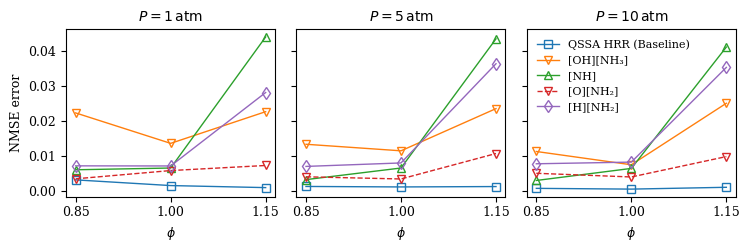

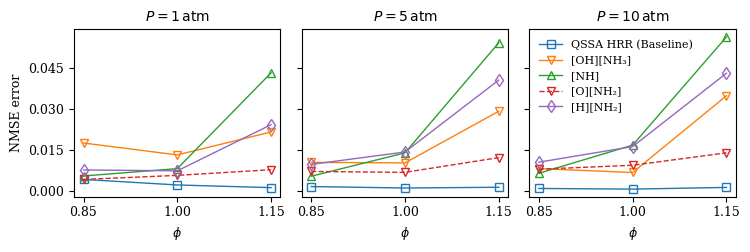

In [29]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FixedLocator, FormatStrFormatter
import matplotlib as mpl
# ─── Paths & settings ──────────────────────────────────────────────────────────
data_path = "SIM_results"
qssa_case = "NH3_2P_CF"
mech      = "Otomo_32s213r"
phis      = ["0.85", "1.00", "1.15"]
pressures = ["1", "5", "10"]

# ─── Option A: change globally ───────────────────────────────────────────────
mpl.rcParams['xtick.labelsize'] = 9
mpl.rcParams['ytick.labelsize'] = 9

# ─── Normalize helper ──────────────────────────────────────────────────────────
def norm(arr):
    return arr / np.max(arr)

# ─── Loaders ───────────────────────────────────────────────────────────────────
def load_sim(case_name):
    fn = os.path.join(data_path, qssa_case, mech, case_name + ".csv")
    return pd.read_csv(fn, comment="#")

def load_qssa(case_name):
    fn = os.path.join("figs", "QSSA", data_path, qssa_case, case_name, mech, "predicted_X.csv")
    return pd.read_csv(fn, comment="#")

# ─── Error functions ────────────────────────────────────────────────────────────
def err_qssa(sim, qssa):
    return np.mean((norm(qssa["HRR"]) - norm(sim["HRR"]))**2)

def err_oh_nh3(sim, _):
    prod = sim["X_OH"] * sim["X_NH3"]
    return np.mean((norm(prod) - norm(sim["HRR"]))**2)

def err_nh(sim, _):
    return np.mean((norm(sim["X_NH"]) - norm(sim["HRR"]))**2)

def err_o_nh2(sim, _):
    prod = sim["X_O"] * sim["X_NH2"]
    return np.mean((norm(prod) - norm(sim["HRR"]))**2)

def err_h_nh2(sim, _):
    prod = sim["X_H"] * sim["X_NH2"]
    return np.mean((norm(prod) - norm(sim["HRR"]))**2)

# ─── Methods dictionary (ordered) ──────────────────────────────────────────────
methods = {
    "QSSA HRR (Baseline)": err_qssa,
    "[OH][NH₃]":            err_oh_nh3,
    "[NH]":                 err_nh,
    "[O][NH₂]":             err_o_nh2,
    "[H][NH₂]":             err_h_nh2,
}

# ─── Style definitions ─────────────────────────────────────────────────────────
labels     = list(methods.keys())
linestyles = ["-", "-", "-", "--", "-"]      # match labels order
markers    = ["s", "v", "^", "v", "d"]        # hollow markers applied below
colors     = plt.get_cmap("tab10").colors[:len(labels)]

def plot_nmse_by_pressure(base_case, out_path):
    # 1) compute errors
    errors = {p: {name: [] for name in methods} for p in pressures}
    for p in pressures:
        for phi in phis:
            case = f"{base_case}_phi{phi}_p{p}"
            sim  = load_sim(case)
            qssa = load_qssa(case)
            for name, fn in methods.items():
                errors[p][name].append(fn(sim, qssa))

    # 2) set up subplots
    fig, axes = plt.subplots(1, len(pressures), figsize=(2.5*len(pressures), 2.5), sharey=True)
    x = [float(phi) for phi in phis]
    tick_phi = x  # we'll lock the x‐ticks exactly here

    # 3) plot each pressure panel
    for idx, (ax, p) in enumerate(zip(axes, pressures)):
        for name, ls, mk, col in zip(labels, linestyles, markers, colors):
            line, = ax.plot(
                x,
                errors[p][name],
                label=name,
                linestyle=ls,
                marker=mk,
                markersize=6,
                linewidth=1,
                color=col,
                markerfacecolor='none',   # hollow
                markeredgecolor=col,      # edge matches line
            )

        # ─── Styling ────────────────────────────────────────────────────────────
        ax.set_title(rf"$P={p}\,\mathrm{{atm}}$", fontsize=10, fontfamily='serif')
        ax.set_xlabel(r"$\phi$", fontsize=9)

        # lock x‐ticks to our phi values, format to 2 decimals
        ax.xaxis.set_major_locator(FixedLocator(tick_phi))
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

        # reduce y‐tick clutter
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

        # leftmost panel gets the Y label
        if idx == 0:
            ax.set_ylabel("NMSE error", fontsize=9)

        # legend only on the rightmost panel
        if idx == len(pressures)-1:
            ax.legend(loc='upper left', frameon=False, fontsize=8)

    # 4) finalize & save
    plt.tight_layout()
    os.makedirs(os.path.dirname(out_path), exist_ok=True)
    plt.savefig(out_path, dpi=300, bbox_inches='tight')
    print(f"→ Saved NMSE figure for {base_case} at: {out_path}")

# ─── Generate both figures ─────────────────────────────────────────────────────
plot_nmse_by_pressure(
    base_case="NH3_1.00_0.00",
    out_path="figs/validation/NMSE_vs_phi_by_pressure_NH3_1.00_0.00.png"
)

plot_nmse_by_pressure(
    base_case="NH3_0.80_0.20",
    out_path="figs/validation/NMSE_vs_phi_by_pressure_NH3_0.80_0.20.png"
)


# Lets try mass fraction;

→ Saved NMSE figure for NH3_1.00_0.00 at: figs/validation/NMSE_vs_phi_by_pressure_NH3_1.00_0.00.png
→ Saved NMSE figure for NH3_0.80_0.20 at: figs/validation/NMSE_vs_phi_by_pressure_NH3_0.80_0.20.png


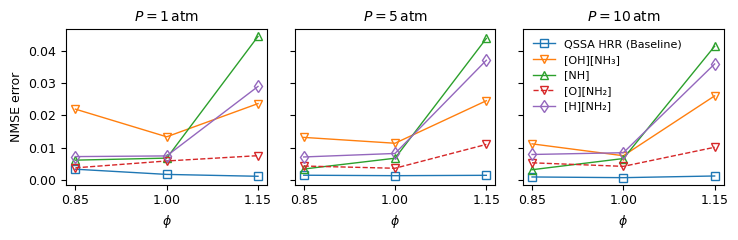

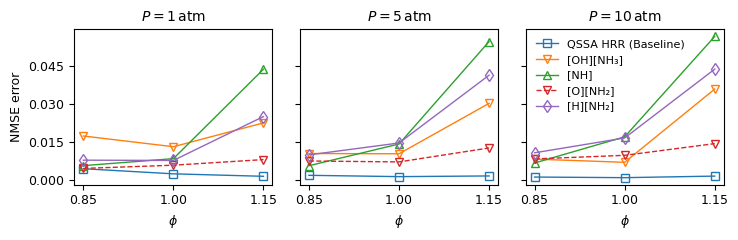

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FixedLocator, FormatStrFormatter
import matplotlib as mpl
# ─── Paths & settings ──────────────────────────────────────────────────────────
data_path = "SIM_results"
qssa_case = "NH3_2P_CF"
mech      = "Otomo_32s213r"
phis      = ["0.85", "1.00", "1.15"]
pressures = ["1", "5", "10"]

# ─── Option A: change globally ───────────────────────────────────────────────
mpl.rcParams['xtick.labelsize'] = 9
mpl.rcParams['ytick.labelsize'] = 9

# ─── Normalize helper ──────────────────────────────────────────────────────────
def norm(arr):
    return arr / np.max(arr)

# ─── Loaders ───────────────────────────────────────────────────────────────────
def load_sim(case_name):
    fn = os.path.join(data_path, qssa_case, mech, case_name + ".csv")
    return pd.read_csv(fn, comment="#")

def load_qssa(case_name):
    fn = os.path.join("figs", "QSSA", data_path, qssa_case, case_name, mech, "predicted_X.csv")
    return pd.read_csv(fn, comment="#")

# ─── Error functions ────────────────────────────────────────────────────────────
def err_qssa(sim, qssa):
    return np.mean((norm(qssa["HRR"]) - norm(sim["HRR"]))**2)

def err_oh_nh3(sim, _):
    prod = sim["Y_OH"] * sim["Y_NH3"]
    return np.mean((norm(prod) - norm(sim["HRR"]))**2)

def err_nh(sim, _):
    return np.mean((norm(sim["Y_NH"]) - norm(sim["HRR"]))**2)

def err_o_nh2(sim, _):
    prod = sim["Y_O"] * sim["Y_NH2"]
    return np.mean((norm(prod) - norm(sim["HRR"]))**2)

def err_h_nh2(sim, _):
    prod = sim["Y_H"] * sim["Y_NH2"]
    return np.mean((norm(prod) - norm(sim["HRR"]))**2)

# ─── Methods dictionary (ordered) ──────────────────────────────────────────────
methods = {
    "QSSA HRR (Baseline)": err_qssa,
    "[OH][NH₃]":            err_oh_nh3,
    "[NH]":                 err_nh,
    "[O][NH₂]":             err_o_nh2,
    "[H][NH₂]":             err_h_nh2,
}

# ─── Style definitions ─────────────────────────────────────────────────────────
labels     = list(methods.keys())
linestyles = ["-", "-", "-", "--", "-"]      # match labels order
markers    = ["s", "v", "^", "v", "d"]        # hollow markers applied below
colors     = plt.get_cmap("tab10").colors[:len(labels)]

def plot_nmse_by_pressure(base_case, out_path):
    # 1) compute errors
    errors = {p: {name: [] for name in methods} for p in pressures}
    for p in pressures:
        for phi in phis:
            case = f"{base_case}_phi{phi}_p{p}"
            sim  = load_sim(case)
            qssa = load_qssa(case)
            for name, fn in methods.items():
                errors[p][name].append(fn(sim, qssa))

    # 2) set up subplots
    fig, axes = plt.subplots(1, len(pressures), figsize=(2.5*len(pressures), 2.5), sharey=True)
    x = [float(phi) for phi in phis]
    tick_phi = x  # we'll lock the x‐ticks exactly here

    # 3) plot each pressure panel
    for idx, (ax, p) in enumerate(zip(axes, pressures)):
        for name, ls, mk, col in zip(labels, linestyles, markers, colors):
            line, = ax.plot(
                x,
                errors[p][name],
                label=name,
                linestyle=ls,
                marker=mk,
                markersize=6,
                linewidth=1,
                color=col,
                markerfacecolor='none',   # hollow
                markeredgecolor=col,      # edge matches line
            )

        # ─── Styling ────────────────────────────────────────────────────────────
        ax.set_title(rf"$P={p}\,\mathrm{{atm}}$", fontsize=10, fontfamily='serif')
        ax.set_xlabel(r"$\phi$", fontsize=9)

        # lock x‐ticks to our phi values, format to 2 decimals
        ax.xaxis.set_major_locator(FixedLocator(tick_phi))
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

        # reduce y‐tick clutter
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

        # leftmost panel gets the Y label
        if idx == 0:
            ax.set_ylabel("NMSE error", fontsize=9)

        # legend only on the rightmost panel
        if idx == len(pressures)-1:
            ax.legend(loc='upper left', frameon=False, fontsize=8)

    # 4) finalize & save
    plt.tight_layout()
    os.makedirs(os.path.dirname(out_path), exist_ok=True)
    plt.savefig(out_path, dpi=300, bbox_inches='tight')
    print(f"→ Saved NMSE figure for {base_case} at: {out_path}")

# ─── Generate both figures ─────────────────────────────────────────────────────
plot_nmse_by_pressure(
    base_case="NH3_1.00_0.00",
    out_path="figs/validation/NMSE_vs_phi_by_pressure_NH3_1.00_0.00.png"
)

plot_nmse_by_pressure(
    base_case="NH3_0.80_0.20",
    out_path="figs/validation/NMSE_vs_phi_by_pressure_NH3_0.80_0.20.png"
)


# figure 4: Compare overall results on NH3 non-premixed flames
现在需要添加OH，并且考察一下

/tmp/ipykernel_46251/1875408585.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0,0,1,1])


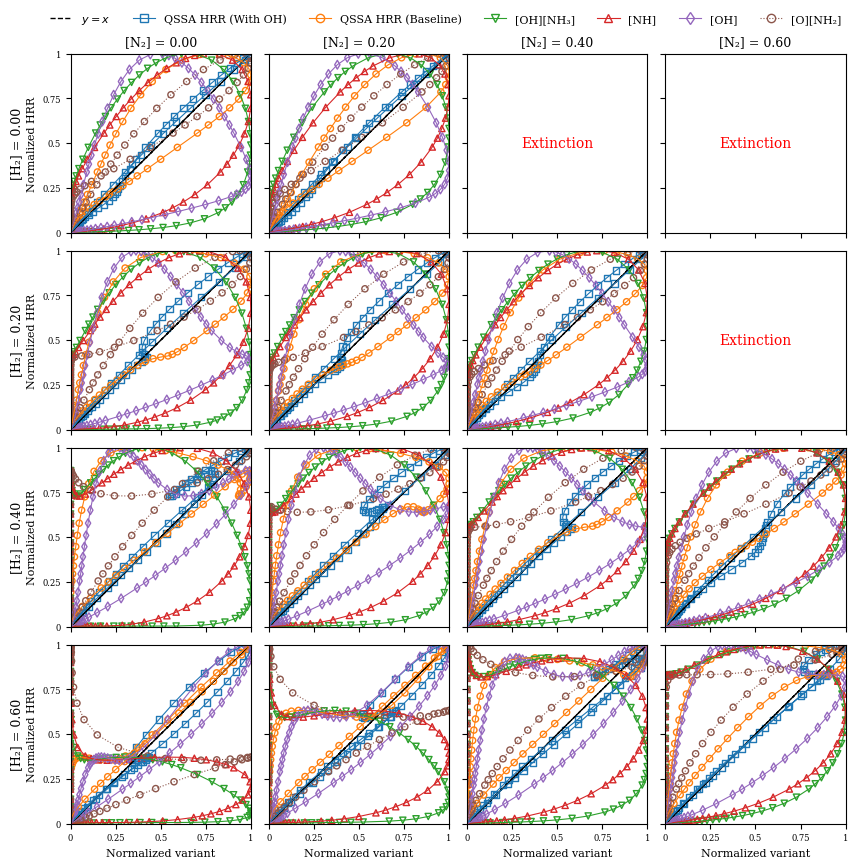

→ Saved figure at: figs/validation/PCI_HRR_vs_variant_with_QSSA_OH.png


In [40]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import FixedLocator, FixedFormatter

# ─── Paths ─────────────────────────────────────────────────────────────────────
SIM_root      = "SIM_results/case_NH3_counterflow_PCI_matrix"
mech          = "Otomo_32s213r"
matrix_root   = os.path.join(SIM_root, mech)
qssa_base     = os.path.join("figs", "QSSA", SIM_root)
qssa_with_OH  = os.path.join("figs", "QSSA", f"{SIM_root}_OH")

# ─── Series definitions ─────────────────────────────────────────────────────────
labels     = [
    "$y = x$",
    "QSSA HRR (With OH)",
    "QSSA HRR (Baseline)",
    "[OH][NH₃]",
    "[NH]",
    "[OH]",
    "[O][NH₂]",
]
linestyles = ["--", "-", "-", "-", "-", "-", ":"]
markers    = [ None, "s", "o", "v", "^", "d", "o" ]

# pick the Tab10 palette
tab10 = plt.get_cmap("tab10").colors
series_colors = {
    "$y = x$":               "black",  # deep blue
    "QSSA HRR (With OH)":    tab10[0],  # orange
    "QSSA HRR (Baseline)":   tab10[1],  # green
    "[OH][NH₃]":             tab10[2],  # red
    "[NH]":                  tab10[3],  # purple
    "[OH]":                  tab10[4],  # brown
    "[O][NH₂]":              tab10[5],  # pink
}
# now build the colors list in label order:
colors = [series_colors[lbl] for lbl in labels]

series_info = list(zip(labels, linestyles, colors, markers))

# ─── Gather & parse all PCI CSVs ───────────────────────────────────────────────
pat = re.compile(
    r"N_CF_NH3_(?P<nh3>[0-9.]+)"
    r"_H2_(?P<h2>[0-9.]+)"
    r"_N2_(?P<n2>[0-9.]+)\.csv$"
)
records = []
for fn in os.listdir(matrix_root):
    m = pat.match(fn)
    if not m:
        continue
    nh3 = float(m.group("nh3"))
    h2  = float(m.group("h2"))
    n2  = float(m.group("n2"))
    total = nh3 + h2 + n2
    if total == 0: continue
    h2b = h2 / (nh3 + h2)
    n2b = n2 / total
    records.append({
        "case":    fn[:-4],
        "sim_csv": os.path.join(matrix_root, fn),
        "h2b":     h2b,
        "n2b":     n2b,
    })
df = pd.DataFrame(records)

# ─── Manually select a 4×4 grid ────────────────────────────────────────────────
h2_vals = [0.0, 0.2, 0.4, 0.6]   # rows = H2‐blend
n2_vals = [0.0, 0.2, 0.4, 0.6]   # cols = N2‐blend

fig, axes = plt.subplots(
    len(h2_vals), len(n2_vals),
    figsize=(2.5 * len(n2_vals), 2.5 * len(h2_vals)),
    sharex=True, sharey=True,
    gridspec_kw={'hspace':0.1, 'wspace':0.1}
)

ticks = [0, 0.25, 0.5, 0.75, 1]
normalize = lambda a: a / np.max(a)

# ─── Plot loop ─────────────────────────────────────────────────────────────────
for i, h2b in enumerate(h2_vals):
    for j, n2b in enumerate(n2_vals):
        ax = axes[i, j]
        sub = df[np.isclose(df["h2b"], h2b) & np.isclose(df["n2b"], n2b)]
        if sub.empty:
            ax.text(0.5, 0.5, "no data", ha='center', va='center',
                    color='gray', fontsize=8)
        else:
            df_sim = pd.read_csv(sub.iloc[0]["sim_csv"], comment="#")
            if df_sim["T"].max() < 400:
                ax.text(0.5, 0.5, "Extinction", ha='center', va='center',
                        color='red', fontsize=10)
            else:
                case0 = sub.iloc[0]["case"]
                df_qssa_base = pd.read_csv(
                    os.path.join(qssa_base, case0, mech, "predicted_X.csv"),
                    comment="#"
                )
                df_qssa_oh = pd.read_csv(
                    os.path.join(qssa_with_OH, case0, mech, "predicted_X.csv"),
                    comment="#"
                )

                sim_hrr_norm     = normalize(df_sim["HRR"].to_numpy())
                qssa_hrr_norm    = normalize(df_qssa_base["HRR"].to_numpy())
                qssa_hrr_oh_norm = normalize(df_qssa_oh["HRR"].to_numpy())
                oh_nh3 = normalize((df_sim["X_OH"] * df_sim["X_NH3"]).to_numpy())
                nh     = normalize(df_sim["X_NH"].to_numpy())
                oh     = normalize(df_sim["X_OH"].to_numpy())
                o_nh2  = normalize((df_sim["X_O"] * df_sim["X_NH2"]).to_numpy())

                variants = [
                    (sim_hrr_norm,     sim_hrr_norm),
                    (qssa_hrr_oh_norm, sim_hrr_norm),
                    (qssa_hrr_norm,    sim_hrr_norm),
                    (oh_nh3,           sim_hrr_norm),
                    (nh,               sim_hrr_norm),
                    (oh,               sim_hrr_norm),
                    (o_nh2,            sim_hrr_norm),
                ]

                for (_lbl, ls, col, mk), (xv, yv) in zip(series_info, variants):
                    ax.plot(xv, yv, linestyle=ls, color=col,
                            linewidth=(1 if mk is None else 0.8))
                    if mk:
                        ax.scatter(xv, yv, s=20, marker=mk,
                                   facecolors='none', edgecolors=col)

        # axes formatting
        ax.set_xlim(0,1); ax.set_ylim(0,1)
        ax.xaxis.set_major_locator(FixedLocator(ticks))
        ax.xaxis.set_major_formatter(FixedFormatter([str(t) for t in ticks]))
        ax.yaxis.set_major_locator(FixedLocator(ticks))
        ax.yaxis.set_major_formatter(FixedFormatter([str(t) for t in ticks]))
        ax.tick_params(axis='both', labelsize=6)

        if i == len(h2_vals)-1:
            ax.set_xlabel("Normalized variant", fontsize=8)
        else:
            ax.tick_params(axis='x', labelbottom=False)
        if j == 0:
            ax.set_ylabel("Normalized HRR", fontsize=8)
        else:
            ax.tick_params(axis='y', labelleft=False)
        if i == 0:
            ax.set_title(f"[N₂] = {n2b:.2f}", fontsize=9)
        if j == 0:
            ax.text(-0.3, 0.5, f"[H₂] = {h2b:.2f}",
                    transform=ax.transAxes, ha='center', va='center',
                    rotation=90, fontsize=9)

# ─── Legend & save ─────────────────────────────────────────────────────────────
proxies = [
    Line2D([0],[0], linestyle=ls, color=col,
           marker=mk or '', markerfacecolor='none',
           markeredgecolor=col, markersize=6,
           linewidth=(1 if mk is None else 0.8))
    for (_,ls,col,mk) in series_info
]
fig.legend(
    proxies, labels, ncol=len(labels),
    loc='upper center', bbox_to_anchor=(0.5, 0.93),
    frameon=False, fontsize=8
)
fig.tight_layout(rect=[0,0,1,1])

out_dir = "figs/validation"
os.makedirs(out_dir, exist_ok=True)
out_path = os.path.join(out_dir, "PCI_HRR_vs_variant_with_QSSA_OH.png")
plt.savefig(out_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"→ Saved figure at: {out_path}")


# Figure 5: Compare the line figures for NMSE on non-premixed flames

→ Saved NMSE‐blend figure at: figs/validation/NMSE_vs_H2blend_by_N2blend.png


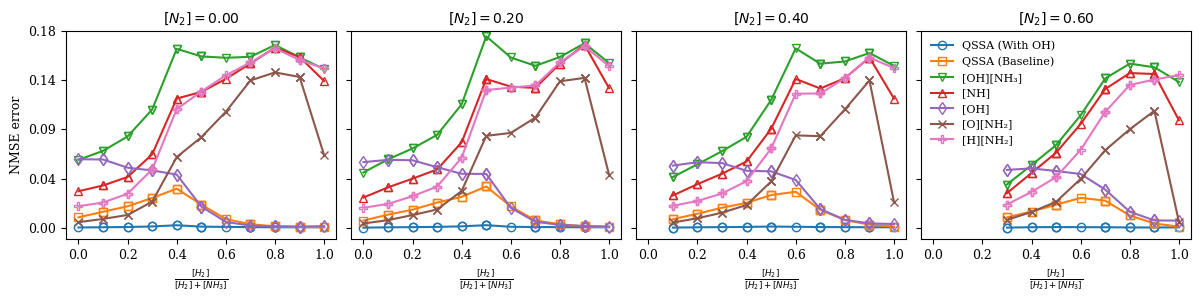

In [61]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FormatStrFormatter

# ─── Paths & blend settings ────────────────────────────────────────────────────
mech = "Otomo_32s213r"
matrix_root = "SIM_results/case_NH3_counterflow_PCI_matrix/Otomo_32s213r"
qssa_base   = "figs/QSSA/SIM_results/case_NH3_counterflow_PCI_matrix/"
qssa_oh     = "figs/QSSA/SIM_results/case_NH3_counterflow_PCI_matrix_OH/"

# ─── Read PCI filenames & blends ────────────────────────────────────────────────
pat = re.compile(r"N_CF_NH3_[0-9.]+_H2_(?P<h2>[0-9.]+)_N2_(?P<n2>[0-9.]+)\.csv$")
records = []
for fn in os.listdir(matrix_root):
    m = pat.match(fn)
    if not m:
        continue
    h2, n2 = float(m.group("h2")), float(m.group("n2"))
    nh3 = 1.0 - h2 - n2
    h2b = h2/(h2+nh3)
    records.append({
        "case": fn[:-4],
        "sim":  os.path.join(matrix_root, fn),
        "h2b":  h2b,
        "n2b":  n2,
    })
df = pd.DataFrame(records)

# ─── Blend‐ratio lists ─────────────────────────────────────────────────────────
h2_vals = sorted(df["h2b"].unique())
n2_vals = sorted(df["n2b"].unique())

# ─── Normalization helper ───────────────────────────────────────────────────────
def norm(arr):
    return arr/np.max(arr)

# ─── Error functions ────────────────────────────────────────────────────────────
def err_qssa(sim, q):       return np.mean((norm(q["HRR"]) - norm(sim["HRR"]))**2)
def err_qssa_oh(sim, q):    return np.mean((norm(q["HRR"]) - norm(sim["HRR"]))**2)
def err_oh_nh3(sim, _):     return np.mean((norm(sim["X_OH"]*sim["X_NH3"]) - norm(sim["HRR"]))**2)
def err_nh(sim, _):         return np.mean((norm(sim["X_NH"]) - norm(sim["HRR"]))**2)
def err_oh(sim, _):         return np.mean((norm(sim["X_OH"]) - norm(sim["HRR"]))**2)
def err_o_nh2(sim, _):      return np.mean((norm(sim["X_O"]*sim["X_NH2"]) - norm(sim["HRR"]))**2)
def err_h_nh2(sim, _):      return np.mean((norm(sim["X_H"]*sim["X_NH2"]) - norm(sim["HRR"]))**2)

# ─── Methods & styles ──────────────────────────────────────────────────────────
methods = {
    "QSSA (With OH)":   err_qssa_oh,
    "QSSA (Baseline)":  err_qssa,
    "[OH][NH₃]":        err_oh_nh3,
    "[NH]":             err_nh,
    "[OH]":             err_oh,
    "[O][NH₂]":         err_o_nh2,
    "[H][NH₂]":         err_h_nh2,
}
labels     = list(methods.keys())
linestyles = ["-"]*len(labels)
markers    = ["o","s","v","^","d","x","P"]

# pick a consistent tab10 color for each method
tab10 = plt.get_cmap("tab10").colors
method_colors = {
    "QSSA (With OH)":   tab10[0],
    "QSSA (Baseline)":  tab10[1],
    "[OH][NH₃]":        tab10[2],
    "[NH]":             tab10[3],
    "[OH]":             tab10[4],
    "[O][NH₂]":         tab10[5],
    "[H][NH₂]":         tab10[6],
}

# ─── Build the 1×4 panel ────────────────────────────────────────────────────────
fig, axes = plt.subplots(1, len(n2_vals), figsize=(3*len(n2_vals), 3), sharey=True)

for ax, n2b in zip(axes, n2_vals):
    for label, ls, mk in zip(labels, linestyles, markers):
        col = method_colors[label]
        errs = []
        for h2b in h2_vals:
            sub = df[np.isclose(df["h2b"], h2b) & np.isclose(df["n2b"], n2b)]
            if sub.empty:
                errs.append(np.nan); continue

            sim = pd.read_csv(sub.iloc[0]["sim"], comment="#")
            if sim["T"].max() < 400:
                errs.append(np.nan)
                continue

            case = sub.iloc[0]["case"]
            q_base = pd.read_csv(os.path.join(qssa_base, case, mech, "predicted_X.csv"), comment="#")
            q_oh   = pd.read_csv(os.path.join(qssa_oh,   case, mech, "predicted_X.csv"), comment="#")
            qdf    = q_oh if label=="QSSA (With OH)" else q_base

            errs.append(methods[label](sim, qdf))

        ax.plot(h2_vals, errs,
                label=label,
                linestyle=ls,
                marker=mk,
                color=col,
                markersize=6,
                markerfacecolor='none',
                markeredgecolor=col)

    ax.set_title(rf"$[N_2] = {n2b:.2f}$", fontsize=10)
    ax.set_xlabel(r"$\frac{[H_2]}{[H_2]+[NH_3]}$", fontsize=9)
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.01, 0.18)
    ax.xaxis.set_major_locator(FixedLocator(np.linspace(0,1,6)))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.set_yticks(np.linspace(0,0.18,5))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

axes[0].set_ylabel("NMSE error", fontsize=9)
axes[-1].legend(loc="upper left", frameon=False, fontsize=8)

plt.tight_layout()
out_dir = "figs/validation"
os.makedirs(out_dir, exist_ok=True)
out_path = os.path.join(out_dir, "NMSE_vs_H2blend_by_N2blend.png")
plt.savefig(out_path, dpi=300, bbox_inches="tight")
print(f"→ Saved NMSE‐blend figure at: {out_path}")


# Figure 6:  Let's start the DNS plot !


yt : [INFO     ] 2025-07-15 01:45:51,616 Parameters: current_time              = 0.14806851292535278
yt : [INFO     ] 2025-07-15 01:45:51,617 Parameters: domain_dimensions         = [1024 1024    1]
yt : [INFO     ] 2025-07-15 01:45:51,618 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-07-15 01:45:51,618 Parameters: domain_right_edge         = [0.07 0.07 1.  ]


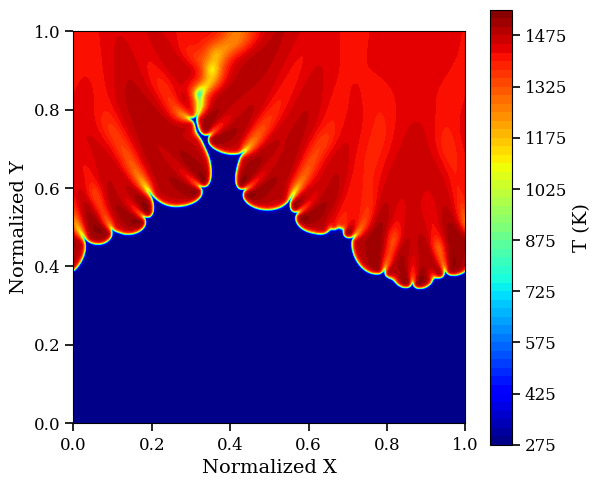

Saved figure to figs/DNS/temperature_level0_jet.png


In [62]:
import yt 
import numpy as np
import matplotlib.pyplot as plt

# ───── 1) Load your AMReX plotfile ─────────────────────────
DNS_path = "SIM_results/DNS_dataset/test_plt15300"
ds = yt.load(DNS_path)

# ───── 2) Build a covering grid at level 0 ─────────────────
left_edge = ds.domain_left_edge
dims      = ds.domain_dimensions   # [Nx, Ny] for 2D
cg = ds.covering_grid(level=0, left_edge=left_edge, dims=dims)

target_value = "temp"
T_raw = cg[target_value].v
T = np.squeeze(T_raw)

# ───── 3) Grid coords ────────────────────────────────────────
Ny, Nx = T.shape
x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)
X, Y = np.meshgrid(x, y)

# ───── 4) Plot & style ───────────────────────────────────────
fig, ax = plt.subplots(figsize=(6,5))
cf = ax.contourf(Y, X, T, levels=50, cmap='jet')

# axis labels
ax.set_xlabel("Normalized X", fontsize=14)
ax.set_ylabel("Normalized Y", fontsize=14)

# tick marks & labels
ax.tick_params(
    axis='both',
    which='major',
    labelsize=12,   # font size of tick‐labels
    length=6,       # length of tick‐marks
    width=1.2       # thickness of tick‐marks
)

# colorbar with bigger ticks
cbar = fig.colorbar(cf, ax=ax, label="T (K)")
cbar.ax.tick_params(labelsize=12, length=6, width=1.2)  # colorbar tick style
cbar.set_label("T (K)", fontsize=14)                    # colorbar label size

ax.set_aspect("equal", "box")
plt.tight_layout()

# ───── 5) Save & show ───────────────────────────────────────
outpath = "figs/DNS/temperature_level0_jet.png"
os.makedirs(os.path.dirname(outpath), exist_ok=True)
plt.savefig(outpath, dpi=300, bbox_inches="tight")
plt.show()
print(f"Saved figure to {outpath}")


yt : [INFO     ] 2025-07-14 19:47:48,524 Parameters: current_time              = 0.14806851292535278
yt : [INFO     ] 2025-07-14 19:47:48,524 Parameters: domain_dimensions         = [1024 1024    1]
yt : [INFO     ] 2025-07-14 19:47:48,525 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-07-14 19:47:48,525 Parameters: domain_right_edge         = [0.07 0.07 1.  ]


Squeezed temp shape: (1024, 1024)
temp range: -1203474.2770060704 → 1875163207.5279355
Saved figure to figs/DNS/temperature_level0_jet.png


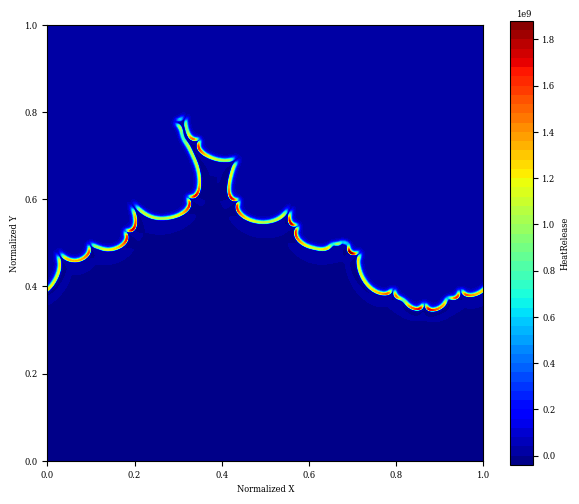

In [44]:
import yt
import numpy as np
import matplotlib.pyplot as plt

# ───── 1) Load your AMReX plotfile ─────────────────────────
# DNS_path = "/data/ZhuXu/Cantera/NeuralRecon/SIM_results/DNS_dataset/NH3/plt17000"

# DNS_path = "/data/ZhuXu/Cantera/NeuralRecon/SIM_results/DNS_dataset/NH3/plt30000"
DNS_path ="SIM_results/DNS_dataset/test_plt15300"
ds = yt.load(DNS_path)


# ───── 2) Build a covering grid at level 0 ─────────────────
left_edge = ds.domain_left_edge
dims      = ds.domain_dimensions   # [Nx, Ny] for 2D

cg = ds.covering_grid(level=0, left_edge=left_edge, dims=dims)

target_value = "HeatRelease"
# target_value = "Y(OH)"

# ───── 3) Extract & squeeze the temperature array ──────────
T_raw = cg[target_value].v     # could be shape (1,Ny,Nx) or (Ny,Nx)
T = np.squeeze(T_raw)    # now guaranteed 2D
if T.ndim != 2:
    raise ValueError(f"Expected 2D temp array after squeezing, got shape {T.shape}")

Ny, Nx = T.shape
print(f"Squeezed temp shape: {T.shape}")

# ───── 4) Create a unit-square mesh ────────────────────────
x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)
X, Y = np.meshgrid(x, y)

# ───── 5) Quick sanity check ───────────────────────────────
print("temp range:", T.min(), "→", T.max())

# ───── 6) Plot & save ──────────────────────────────────────
plt.figure(figsize=(6,5))
cf = plt.contourf(Y, X, T, levels=50, cmap='jet')
plt.xlabel("Normalized X")
plt.ylabel("Normalized Y")
plt.colorbar(cf, label="HeatRelease")
plt.gca().set_aspect("equal", "box")
plt.tight_layout()

# Save to PNG
plt.savefig("figs/DNS/temperature_level0_jet.png", dpi=300)
print("Saved figure to figs/DNS/temperature_level0_jet.png")

plt.show()

# Figure7: Compare the reconstructed figures for H2 flames

→ Saved combined_contour_comparison_6x1.png


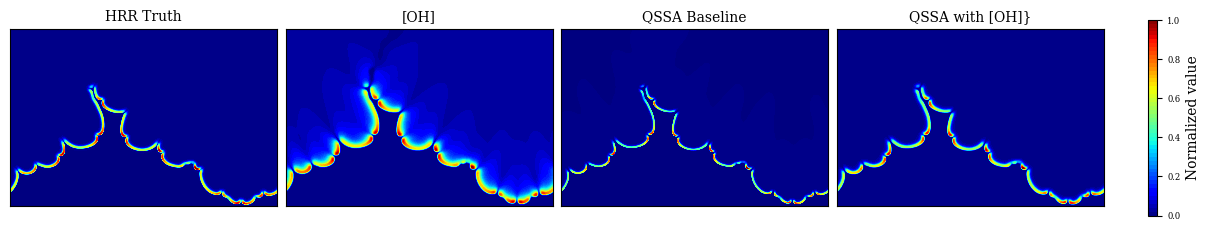

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DNS_path ="SIM_results/DNS_dataset/test_plt15300"


# ─── 1) Read your two datasets ────────────────────────────────────────────────
df1 = pd.read_csv(
    "/data/ZhuXu/Cantera/NeuralRecon/SIM_results/DNS_dataset/test_plt15300/H2_pNOX_15_94_TC/DNS_reduced_data.csv"
)
df2 = pd.read_csv(
    "/data/ZhuXu/Cantera/NeuralRecon/figs/QSSA/SIM_results/DNS_dataset/test_plt15300/DNS_reduced_data/H2_pNOX_15_94_TC/predicted_X.csv"
)
df3 = pd.read_csv(
    "/data/ZhuXu/Cantera/NeuralRecon/figs/QSSA/SIM_results/DNS_dataset/test_plt15300/DNS_reduced_data_OH/H2_pNOX_15_94_TC/predicted_X.csv"
)
# ─── 2) Build a regular grid of your normalized coords from df1 ───────────────
xs = np.sort(df1["Normalized X"].unique())
ys = np.sort(df1["Normalized Y"].unique())
Xg, Yg = np.meshgrid(xs, ys)


# ─── 4) Define which fields to plot ───────────────────────────────────────────
fields = [
    ("HRR Truth",    df1, "HRR",     True),
    ("[OH]",     df1, "Y_OH",    True),
    ("QSSA Baseline",   df2, "HRR",     True),
    ("QSSA with [OH]}",   df3, "HRR",     True),
    
]

# ─── 5) Make a 6×1 panel with one shared colorbar ────────────────────────────
fig, axes = plt.subplots(1, 4, figsize=(12, 4), constrained_layout=True)
vmin, vmax = 0, 1  # all normalized 0→1

for ax, (title, df, col, do_norm) in zip(axes, fields):
    # pivot grid
    Zraw = df.pivot_table(
        index="Normalized Y",
        columns="Normalized X",
        values=col,
        fill_value=0
    ).values

    # normalize if requested
    Z = Zraw / Zraw.max() if do_norm else Zraw

    # contourf: swap X/Y so Y runs along x‐axis
    cf = ax.contourf(
        Yg, Xg, Z,
        levels=50, cmap="jet",
        vmin=vmin, vmax=vmax
    )
    ax.set_title(title, fontsize=10)
    ax.set_aspect("equal", "box")

# ─── Finally: remove ticks & only show y‐labels on first subplot ────────────
for ax in axes:
    # no tick marks at all
    ax.tick_params(
        axis='both',       # both x and y
        which='both',      # major and minor
        length=0,          # no tick‐lines
        labelbottom=False, # no x‐tick labels
        labelleft=False    # no y‐tick labels
    )


cbar = fig.colorbar(
    cf,
    ax=axes.tolist(),
    orientation="vertical",
    fraction=0.05,
    pad=0.04,
    shrink=0.5
)
cbar.set_label("Normalized value", fontsize=10)

# force the CB ticks to 0.0,0.2,…,1.0
tick_vals = np.linspace(0, 1, 6)
cbar.set_ticks(tick_vals)
cbar.set_ticklabels([f"{t:.1f}" for t in tick_vals])
# ─── 6) Save & show ───────────────────────────────────────────────────────────
outname = "combined_contour_comparison_6x1.png"
plt.savefig(outname, dpi=300)
print(f"→ Saved {outname}")
plt.show()


# Plot the DNS NH3 Flame!


yt : [INFO     ] 2025-07-20 14:22:10,564 Parameters: current_time              = 0.04025760062073119


yt : [INFO     ] 2025-07-20 14:22:10,564 Parameters: domain_dimensions         = [1024 1024    1]
yt : [INFO     ] 2025-07-20 14:22:10,565 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-07-20 14:22:10,565 Parameters: domain_right_edge         = [0.05 0.05 1.  ]
yt : [INFO     ] 2025-07-20 14:22:10,868 Parameters: current_time              = 0.06274267594231073
yt : [INFO     ] 2025-07-20 14:22:10,869 Parameters: domain_dimensions         = [1024 1024    1]
yt : [INFO     ] 2025-07-20 14:22:10,869 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-07-20 14:22:10,869 Parameters: domain_right_edge         = [0.05 0.05 1.  ]
yt : [INFO     ] 2025-07-20 14:22:11,172 Parameters: current_time              = 0.10227469014599318
yt : [INFO     ] 2025-07-20 14:22:11,173 Parameters: domain_dimensions         = [1024 1024    1]
yt : [INFO     ] 2025-07-20 14:22:11,173 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-07-20 14:2

Saved figure to figs/DNS/temperature_3cases_row.png


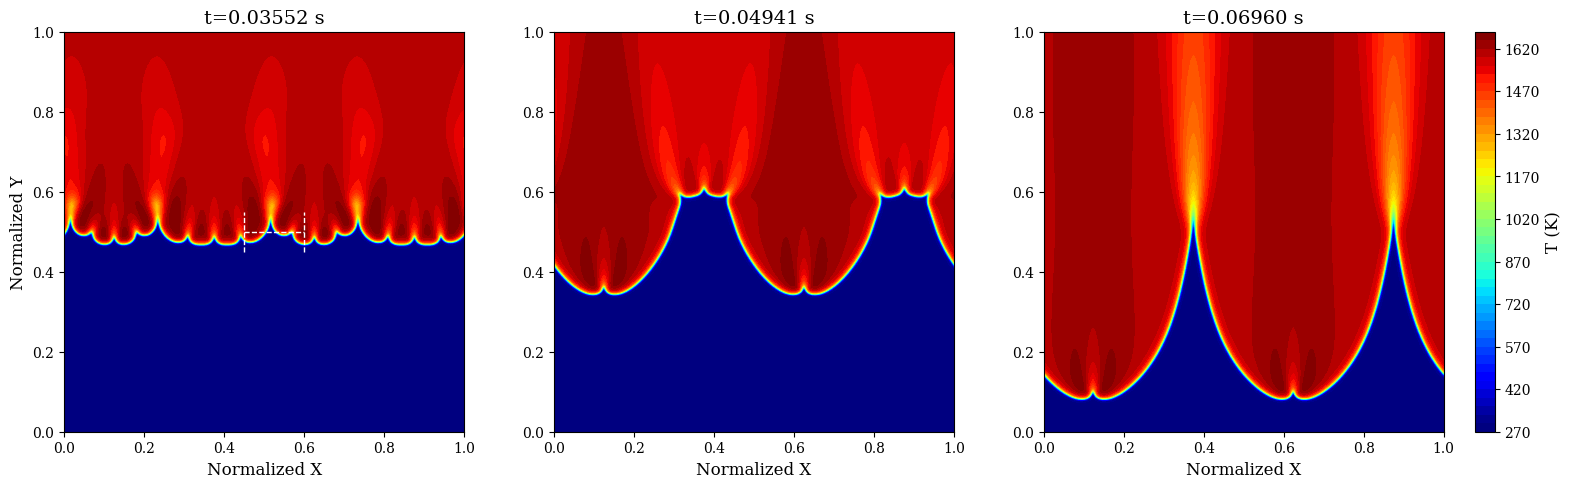

In [20]:
import yt
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# ───── 0) Define your cases, times, and base path ──────────
column_names = ["plt12000", "plt17000", "plt30000"]
time_tags    = ["t=0.03552 s", "t=0.04941 s", "t=0.06960 s"]
base_path    = Path("/data/ZhuXu/Cantera/NeuralRecon/SIM_results/DNS_dataset/NH3")
target_value = "temp"

# ───── 1) Preload all temperature arrays to get common vmin/vmax ──────────
all_T = []
for name in column_names:
    ds = yt.load(str(base_path / name))
    cg = ds.covering_grid(
        level=0,
        left_edge=ds.domain_left_edge,
        dims=ds.domain_dimensions
    )
    T = np.squeeze(cg[target_value].v)
    all_T.append(T)

vmin = min(t.min() for t in all_T)
vmax = max(t.max() for t in all_T)

# ───── 2) Create a 1×3 row of plots with reduced gaps ──────────
fig, axes = plt.subplots(
    1, len(column_names),
    figsize=(18, 5),
    constrained_layout=False
)
fig.subplots_adjust(wspace=0.05, left=0.07, right=0.93, top=0.90, bottom=0.10)

for ax, name, ttag, T in zip(axes, column_names, time_tags, all_T):
    Ny, Nx = T.shape
    x = np.linspace(0, 1, Nx)
    y = np.linspace(0, 1, Ny)
    X, Y = np.meshgrid(x, y)

    cf = ax.contourf(
        Y, X, T,
        levels=50,
        cmap="jet",
        vmin=vmin, vmax=vmax
    )

    # Highlight the region & line on the first subplot only
    if ax is axes[0]:
        # vertical lines from y=0 to y=1 at x=0.45 and x=0.6
        ax.vlines([0.45, 0.6], ymin=0.45, ymax=0.55,
                  color='white', linestyle='--', linewidth=1)
        # horizontal line at y=0.5 from x=0.45 to x=0.6
        ax.hlines(0.5, xmin=0.45, xmax=0.6,
                  color='white', linestyle='--', linewidth=1)

    ax.set_title(ttag, fontsize=14)
    ax.set_xlabel("Normalized X", fontsize=12)
    ax.tick_params(axis="both", labelsize=10)
    ax.set_aspect("equal", "box")
    if ax is axes[0]:
        ax.set_ylabel("Normalized Y", fontsize=12)

# ───── 3) Single shared colorbar with larger font ──────────
cbar = fig.colorbar(
    cf,
    ax=axes,
    orientation="vertical",
    fraction=0.046,
    pad=0.02
)
cbar.ax.tick_params(labelsize=10)
cbar.set_label("T (K)", fontsize=12)

# ───── 4) Save & show ──────────
outpath = Path("figs/DNS/temperature_3cases_row.png")
fig.savefig(outpath, dpi=300)
print(f"Saved figure to {outpath}")
plt.show()

# Figure 8: Plot the reconstrcuted NH3 Flame!

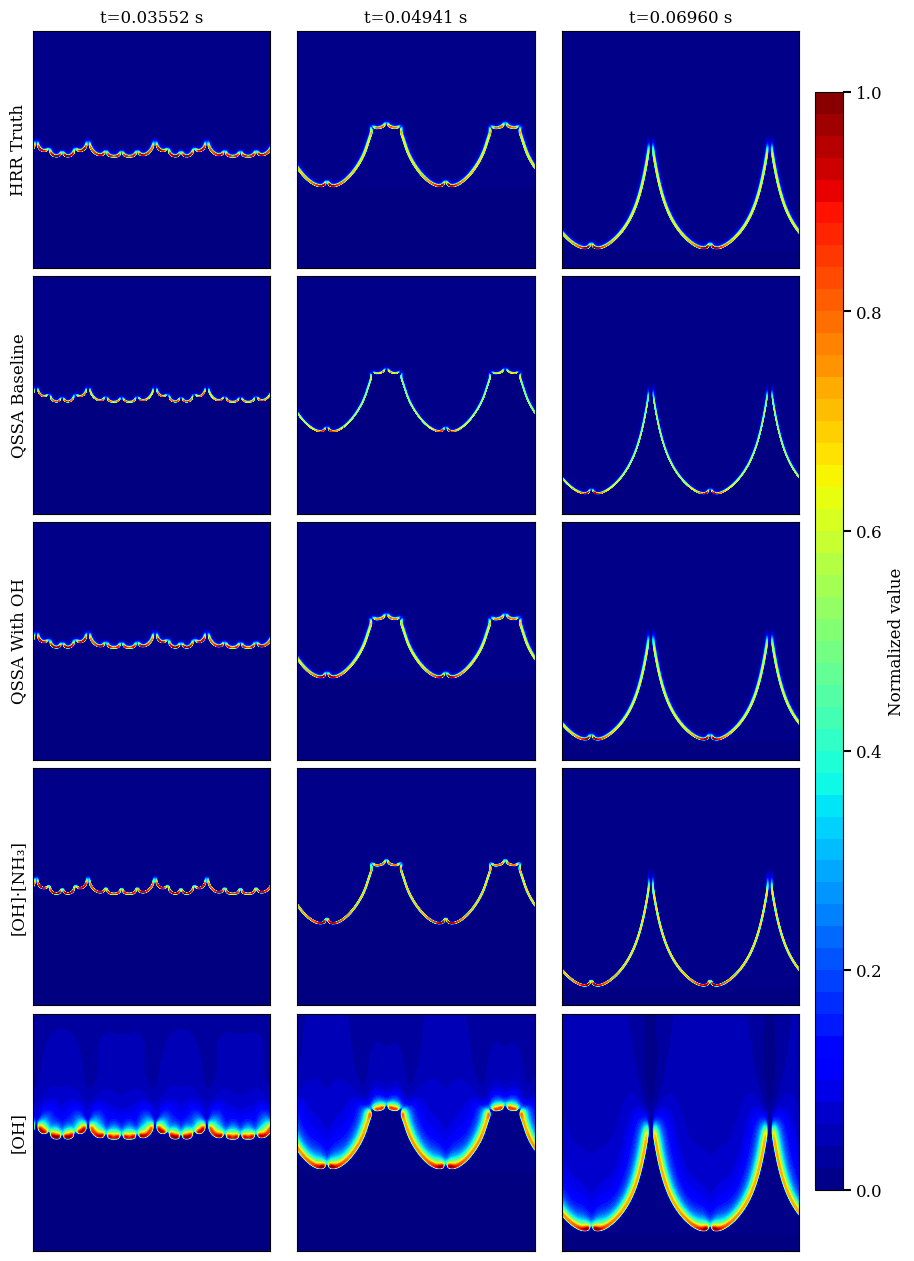

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ─── Folders to compare ───────────────────────────────────────────────
column_names = ["plt12000","plt17000", "plt30000"]
time_tags    = ["t=0.03552 s","t=0.04941 s","t=0.06960 s"]

ncols        = len(column_names)

# ─── Paths ────────────────────────────────────────────────────────────
dns_base   = "/data/ZhuXu/Cantera/NeuralRecon/SIM_results/DNS_dataset/NH3"
qssa_base  = "/data/ZhuXu/Cantera/NeuralRecon/figs/QSSA/SIM_results/DNS_dataset/NH3"

# ─── DNS‐derived methods ──────────────────────────────────────────────
def norm(x): 
    return x/np.max(x)

dns_methods = {
    "HRR":        lambda df: norm(df["HRR"].values),
    "[OH]·[NH₃]": lambda df: norm(df["Y_OH"].values * df["Y_NH3"].values),
    "[OH]":       lambda df: norm(df["Y_OH"].values),
}

# ─── QSSA loaders ──────────────────────────────────────────────────────
def load_qssa_baseline(plt_dir):
    fn = os.path.join(qssa_base, plt_dir, "DNS_reduced_data",
                      "Otomo_32s213r", "predicted_X.csv")
    return pd.read_csv(fn, comment="#")["HRR"].values

def load_qssa_with_oh(plt_dir):
    fn = os.path.join(qssa_base, plt_dir, "DNS_reduced_data_OH",
                      "Otomo_32s213r", "predicted_X.csv")
    return pd.read_csv(fn, comment="#")["HRR"].values

# ─── Which rows to plot ────────────────────────────────────────────────
all_keys = [
    "HRR Truth",        # will map to dns_methods["HRR"]
    "QSSA Baseline",    # special case
    "QSSA With OH",     # special case
    "[OH]·[NH₃]",       # dns_methods
    "[OH]",             # dns_methods
]

# ─── Prep figure ───────────────────────────────────────────────────────
nrows = len(all_keys)
fig, axes = plt.subplots(nrows, ncols,
                         figsize=(3*ncols, 2.5*nrows),
                         constrained_layout=True)

cmap = plt.get_cmap("jet")
vmin, vmax = 0, 1

for col_idx, plt_dir in enumerate(column_names):
    # 1) load DNS & build mesh
    dns_fn = os.path.join(dns_base, plt_dir,
                          "Otomo_32s213r", "DNS_reduced_data.csv")
    df_dns = pd.read_csv(dns_fn, comment="#")
    xs = np.sort(df_dns["Normalized X"].unique())
    ys = np.sort(df_dns["Normalized Y"].unique())
    Xg, Yg = np.meshgrid(xs, ys)

    # 2) product columns if needed
    df_dns["Y_OH"]  = df_dns["Y_OH"]
    df_dns["Y_NH3"] = df_dns["Y_NH3"]

    # 3) loop over rows
    for row_idx, key in enumerate(all_keys):
        ax = axes[row_idx, col_idx]

        if key == "HRR Truth":
            Z = dns_methods["HRR"](df_dns)

        elif key == "QSSA Baseline":
            raw = load_qssa_baseline(plt_dir)
            Z   = raw / raw.max()

        elif key == "QSSA With OH":
            raw = load_qssa_with_oh(plt_dir)
            Z   = raw / raw.max()

        else:
            # must be exactly one of the dns_methods keys
            Z = dns_methods[key](df_dns)

        # 4) pivot + fill
        Zgrid = (
            df_dns.assign(Z=Z)
                  .pivot_table(index="Normalized Y",
                               columns="Normalized X",
                               values="Z",
                               fill_value=0)
                  .reindex(index=ys, columns=xs, fill_value=0)
                  .values
        )

        # 5) contour‐plot
        cf = ax.contourf(Yg, Xg, Zgrid,
                         levels=50, cmap=cmap,
                         vmin=vmin, vmax=vmax,
                         corner_mask=False)
        ax.set_facecolor(cmap(0.0))
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)

        # 6) labels only on left & top
        if col_idx == 0:
            ax.set_ylabel(key, fontsize=12)
        if row_idx == 0:
            ax.set_title(time_tags[col_idx], fontsize=12)

        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_aspect("equal","box")

# ─── shared colorbar on right ──────────────────────────────────────────────
cbar = fig.colorbar(cf, ax=axes.ravel().tolist(),
                    orientation="vertical",
                    fraction=0.6, pad=0.02,
                    shrink=0.9, aspect=40)
cbar.set_label("Normalized value", fontsize=12)
cbar.ax.tick_params(labelsize=12, length=6, width=1.5)
ticks = np.linspace(0,1,6)
cbar.set_ticks(ticks)
cbar.set_ticklabels([f"{t:.1f}" for t in ticks])

plt.savefig("comparison_methods_uniform_axes.png", dpi=300, bbox_inches="tight")
# plt.show()


Saved combined plot to normalized_HRR_and_markers_A4.png


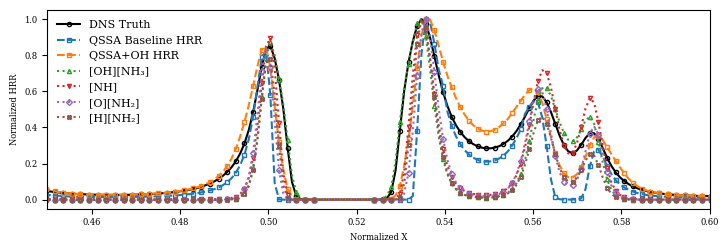

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ───── 0) Which column holds your HRR? ──────────
target_value = "HRR"

# ───── 1) Define file paths ──────────
dns_csv           = Path("SIM_results/DNS_dataset/NH3/plt12000_line/Otomo_32s213r/DNS_reduced_data.csv")
pred_csv          = Path("figs/QSSA/SIM_results/DNS_dataset/NH3/plt12000_line/DNS_reduced_data/Otomo_32s213r/predicted_X.csv")
pred_with_OH_csv  = Path("figs/QSSA/SIM_results/DNS_dataset/NH3/plt12000_line/DNS_reduced_data_OH/Otomo_32s213r/predicted_X.csv")

# ───── 2) Load data ──────────
df_dns     = pd.read_csv(dns_csv)
df_pred    = pd.read_csv(pred_csv)
df_pred_oh = pd.read_csv(pred_with_OH_csv)

# ───── 3) Extract x and normalize HRR ──────────
x = df_dns["Normalized Y"]
hrr_dns_norm     = df_dns[target_value]     / df_dns[target_value].max()
hrr_pred_norm    = df_pred[target_value]    / df_pred[target_value].max()
hrr_pred_oh_norm = df_pred_oh[target_value] / df_pred_oh[target_value].max()

# ───── 4) Compute & normalize flame-marker signals ──────────
def norm(arr):
    return arr / arr.max()

markers_data = {
    "[OH][NH₃]": df_dns["Y_OH"] * df_dns["Y_NH3"],
    "[NH]":      df_dns["Y_NH"],
    "[O][NH₂]":  df_dns["Y_O"] * df_dns["Y_NH2"],
    "[H][NH₂]":  df_dns["Y_H"] * df_dns["Y_NH2"],
}
markers_norm = {label: norm(series) for label, series in markers_data.items()}

# ───── 5) Create A4‐sized figure spanning two columns ──────────
fig, ax = plt.subplots(figsize=(7.27, 2.5))  # width x height in inches

tab10 = plt.get_cmap("tab10").colors

# DNS Truth (black, hollow circles)
ax.plot(
    x, hrr_dns_norm,
    marker='o', linestyle='-',
    color='black', label="DNS Truth",
    markerfacecolor='none', markeredgecolor='black',
    markersize=3, markevery=2
)

# QSSA HRR (hollow squares)
ax.plot(
    x, hrr_pred_norm,
    marker='s', linestyle='--',
    color=tab10[0], label="QSSA Baseline HRR",
    markerfacecolor='none', markeredgecolor=tab10[0],
    markersize=3, markevery=2
)

# QSSA + OH HRR (hollow squares)
ax.plot(
    x, hrr_pred_oh_norm,
    marker='s', linestyle='--',
    color=tab10[1], label="QSSA+OH HRR",
    markerfacecolor='none', markeredgecolor=tab10[1],
    markersize=3, markevery=2
)

# Flame-marker curves (hollow markers, different symbols/colors)
marker_styles = ["^", "v", "D", "X", "p"]
for (label, series), mk, col in zip(markers_norm.items(), marker_styles, tab10[2:]):
    ax.plot(
        x, series,
        marker=mk, linestyle=':',
        color=col, label=label,
        markerfacecolor='none', markeredgecolor=col,
        markersize=3, markevery=2
    )

ax.set_xlabel("Normalized X")
ax.set_ylabel("Normalized HRR")
ax.set_xlim(0.45, 0.6)
ax.legend(loc="upper left", fontsize=8, frameon=False)

fig.tight_layout()

# ───── 6) Save as high-res PDF ──────────
outname = "normalized_HRR_and_markers_A4.png"
fig.savefig(outname, dpi=300, format="pdf", bbox_inches="tight")
print(f"Saved combined plot to {outname}")
plt.show()

plt12000 - QSSA Baseline: Σ(error²) over valid = 1573.13969
plt12000 - QSSA With OH: Σ(error²) over valid = 493.03183
plt12000 - [OH]·[NH₃]: Σ(error²) over valid = 518.72816
plt12000 - [OH]: Σ(error²) over valid = 11174.13959
plt12000 - [NH]: Σ(error²) over valid = 702.07407
plt12000 - [O][NH₂]: Σ(error²) over valid = 1074.73463
plt12000 - [H][NH₂]: Σ(error²) over valid = 1036.56896
plt17000 - QSSA Baseline: Σ(error²) over valid = 1503.28029
plt17000 - QSSA With OH: Σ(error²) over valid = 462.00418
plt17000 - [OH]·[NH₃]: Σ(error²) over valid = 535.44209
plt17000 - [OH]: Σ(error²) over valid = 12128.09866
plt17000 - [NH]: Σ(error²) over valid = 628.62630
plt17000 - [O][NH₂]: Σ(error²) over valid = 1039.90276
plt17000 - [H][NH₂]: Σ(error²) over valid = 1113.85245
plt30000 - QSSA Baseline: Σ(error²) over valid = 1736.98016
plt30000 - QSSA With OH: Σ(error²) over valid = 547.56865
plt30000 - [OH]·[NH₃]: Σ(error²) over valid = 657.40881
plt30000 - [OH]: Σ(error²) over valid = 15272.97215
pl

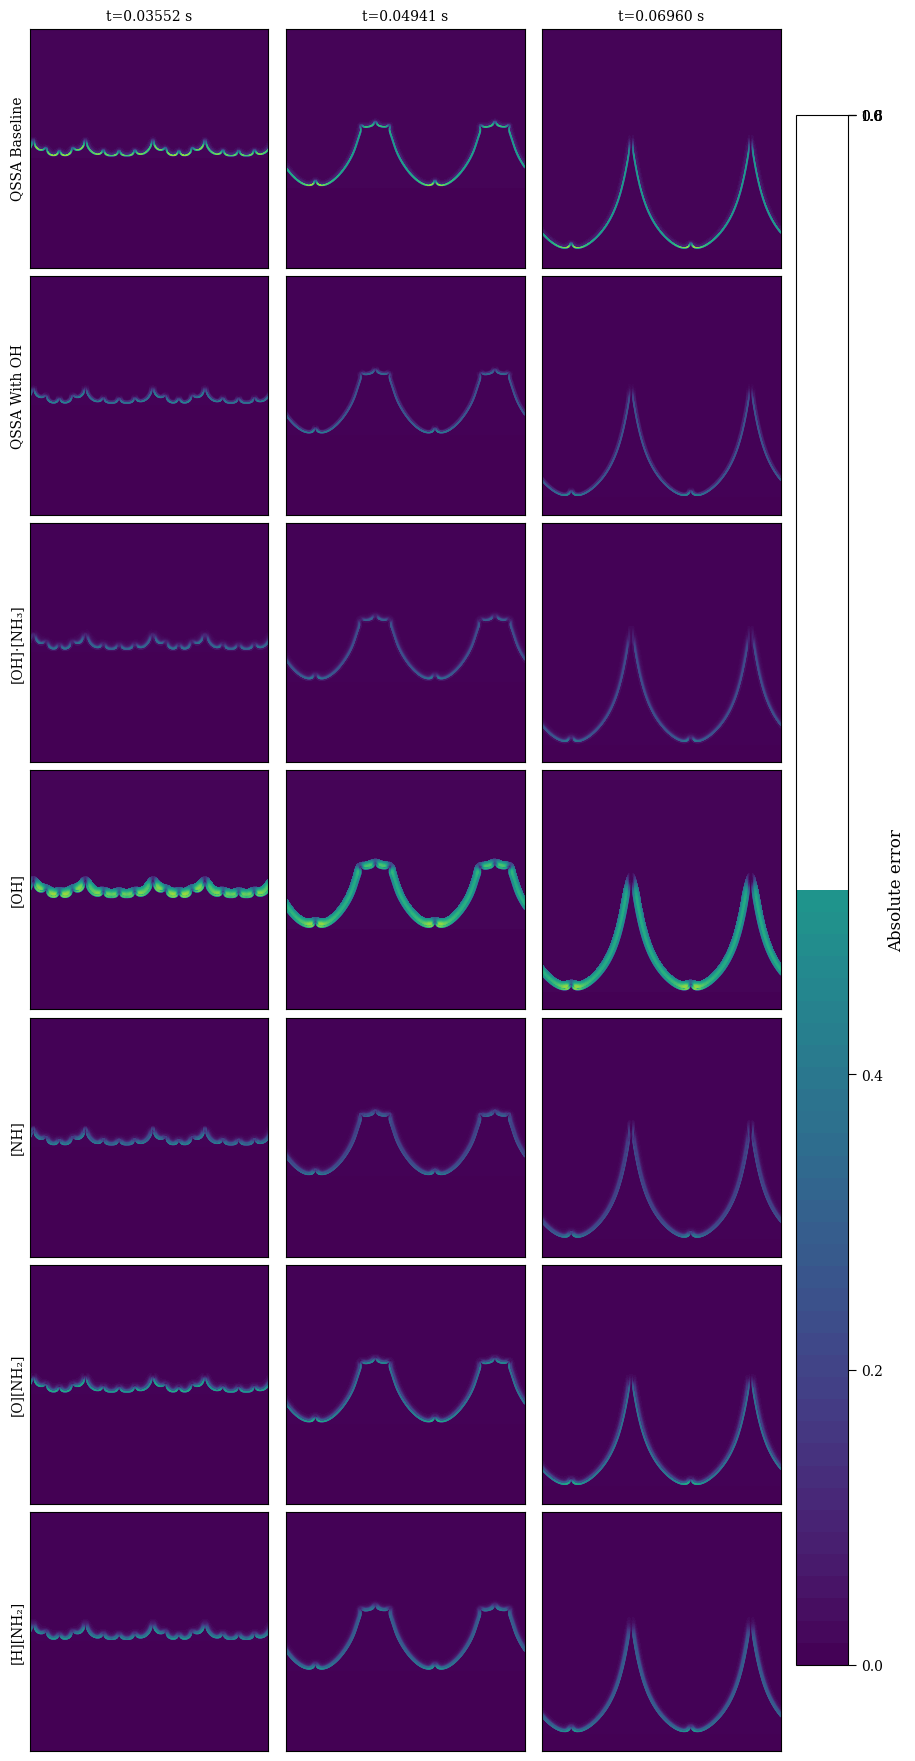

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ─── User settings ─────────────────────────────────────────────────────────
column_names = ["plt12000","plt17000", "plt30000"]
time_tags    = ["t=0.03552 s","t=0.04941 s","t=0.06960 s"]


# column_names = ["plt12000", "plt17000", "plt30000"]
# time_tags    = ["t=0.03552 s", "t=0.04941 s", "t=0.06960 s"]
ncols        = len(column_names)

dns_base  = "/data/ZhuXu/Cantera/NeuralRecon/SIM_results/DNS_dataset/NH3"
qssa_base = "/data/ZhuXu/Cantera/NeuralRecon/figs/QSSA/SIM_results/DNS_dataset/NH3"

# ─── DNS‐derived variants ───────────────────────────────────────────────────
def norm(x):
    return x / np.max(x)

dns_methods = {
    "[OH]·[NH₃]": lambda df: norm(df["Y_OH"].values * df["Y_NH3"].values),
    "[OH]":       lambda df: norm(df["Y_OH"].values),
    "[NH]":       lambda df: norm(df["Y_NH"].values),
    "[O][NH₂]":   lambda df: norm(df["Y_O"].values   * df["Y_NH2"].values),
    "[H][NH₂]":   lambda df: norm(df["Y_H"].values   * df["Y_NH2"].values),
}

# ─── QSSA loaders ────────────────────────────────────────────────────────────
def load_qssa_baseline(plt_dir):
    fn = os.path.join(qssa_base, plt_dir, "DNS_reduced_data",
                      "Otomo_32s213r", "predicted_X.csv")
    return pd.read_csv(fn, comment="#")["HRR"].values

def load_qssa_with_oh(plt_dir):
    fn = os.path.join(qssa_base, plt_dir, "DNS_reduced_data_OH",
                      "Otomo_32s213r", "predicted_X.csv")
    return pd.read_csv(fn, comment="#")["HRR"].values

# ─── The error‐fields we’ll plot ─────────────────────────────────────────────
error_keys = [
    "QSSA Baseline",
    "QSSA With OH",
    "[OH]·[NH₃]",
    "[OH]",
    "[NH]",
    "[O][NH₂]",
    "[H][NH₂]",
]

# ─── Make figure ─────────────────────────────────────────────────────────────
nrows = len(error_keys)
fig, axes = plt.subplots(nrows, ncols,
                         figsize=(3*ncols, 2.5*nrows),
                         constrained_layout=True)

cmap = plt.get_cmap("viridis")
vmin, vmax = 0, 1.0  # absolute error of two normalized fields also in [0,1]

for col_idx, plt_dir in enumerate(column_names):
    # 1) load DNS & make grid
    dns_fn = os.path.join(dns_base, plt_dir,
                          "Otomo_32s213r", "DNS_reduced_data.csv")
    df_dns = pd.read_csv(dns_fn, comment="#")

    xs = np.sort(df_dns["Normalized X"].unique())
    ys = np.sort(df_dns["Normalized Y"].unique())
    Xg, Yg = np.meshgrid(xs, ys)

    # 2) DNS HRR truth, normalized
    truth = df_dns["HRR"].to_numpy()
    truth_norm = truth / truth.max()
    truth_grid = (
        df_dns.assign(Z=truth_norm)
              .pivot_table(index="Normalized Y",
                           columns="Normalized X",
                           values="Z",
                           fill_value=0)
              .reindex(index=ys, columns=xs, fill_value=0)
              .values
    )

    # mask out low‐HRR regions
    valid = truth_grid >= 0.01

    for row_idx, key in enumerate(error_keys):
        ax = axes[row_idx, col_idx]

        # 3) build the variant (normalized)
        if key == "QSSA Baseline":
            raw = load_qssa_baseline(plt_dir)
            var = raw / raw.max()
        elif key == "QSSA With OH":
            raw = load_qssa_with_oh(plt_dir)
            var = raw / raw.max()
        else:
            var = dns_methods[key](df_dns)

        # 4) pivot into full grid
        var_grid = (
            df_dns.assign(Z=var)
                  .pivot_table(index="Normalized Y",
                               columns="Normalized X",
                               values="Z",
                               fill_value=0)
                  .reindex(index=ys, columns=xs, fill_value=0)
                  .values
        )

        # 5) absolute error
        abs_err = np.abs(var_grid - truth_grid)
        # zero out low‐HRR cells
        abs_err[~valid] = 0.0
        # clamp
        abs_err = np.clip(abs_err, vmin, vmax)

        # compute sum of squared errors over valid region
        sq = abs_err[valid]**2
        acc_err = np.nansum(sq)
        print(f"{plt_dir} - {key}: Σ(error²) over valid = {acc_err:.5f}")

        # 6) plot
        cf = ax.contourf(
            Yg, Xg, abs_err,
            levels=50, cmap=cmap,
            vmin=vmin, vmax=vmax
        )
        ax.set_facecolor(cmap(0.0))
        ax.set_xlim(0,1); ax.set_ylim(0,1)
        ax.set_aspect("equal","box")

        # annotate only on left & top
        if col_idx == 0:
            ax.set_ylabel(key, fontsize=10)
        if row_idx == 0:
            ax.set_title(time_tags[col_idx], fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])

# ─── shared colorbar ─────────────────────────────────────────────────────────
cbar = fig.colorbar(cf, ax=axes.ravel().tolist(),
                    orientation="vertical",
                    fraction=0.6, pad=0.02,
                    shrink=0.9, aspect=30)
cbar.set_label("Absolute error", fontsize=12)
cbar.ax.tick_params(labelsize=10, length=6)
cbar.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
cbar.set_ticklabels(["0.0", "0.2", "0.4", "0.6", "0.8", "1.0"])

plt.savefig("absolute_error_comparison_sumofsquares.png", dpi=300, bbox_inches="tight")
plt.show()

# 建议debug一下看看是啥情况 （取一条线出来重构）
